**GOAL OF THIS PROJECT**
 - validate and refine hypotheses
 - identify patterns and trends
 - report with analyzes
 - machine learning model to predict diamond prices
 
 **PLANNING**
  - definition of the problem
      - know exactly what the objective is
  - collect
       - data collection
  - data description
       - check NAN
       - statistical metrics
       - clear NAN
  -eda
      - creation and validation of hypotheses
  - preprocessing
      - checking the range of values
      - coding of variable categories maintaining their degree of importance
  - ML Models
      - test 3 models
  - Metrics
      - test 5 metrics for ranking issues

# import

In [1]:
import pandas as pd

#graphs
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

#metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [2]:
path = '/home/wendrel/Data-Science/files/diamonds.csv'
data = pd.read_csv(path,index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**columns**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

**quality hierarchy**
-------------
cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

-------------------------------------------------------

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# data description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#checking the existence of NAN -> missing values
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

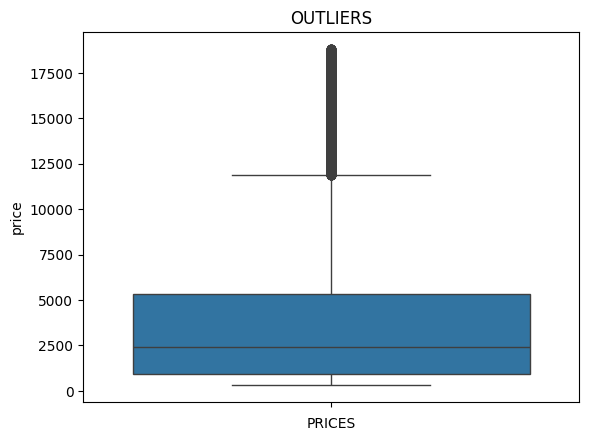

In [6]:
#checking for outliers
sns.boxplot(data.price)
plt.title('OUTLIERS')
plt.xlabel('PRICES')
plt.show()

#there is a large number of outliers as there are some coherent factors that change the price of diamonds
#so it's not a mistake

# EDA (Exploratory Data Analysis)

In [7]:
#checking the distribution of price columnsplt.hist(data.price, bins=10,edgecolor='black')
plt.show()

/tmp/ipykernel_7424/2378407523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[col].values, y = data[col].index,palette='pastel')


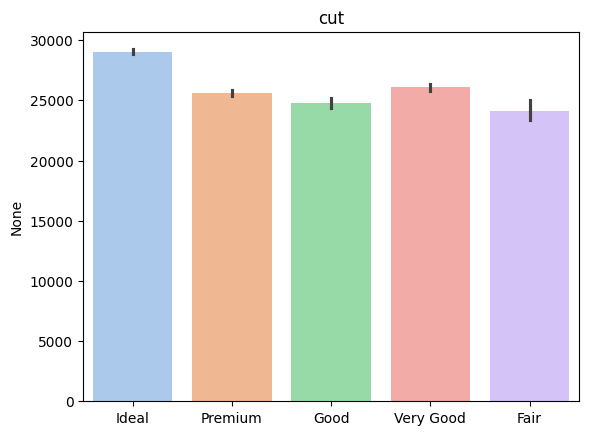

/tmp/ipykernel_7424/2378407523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[col].values, y = data[col].index,palette='pastel')


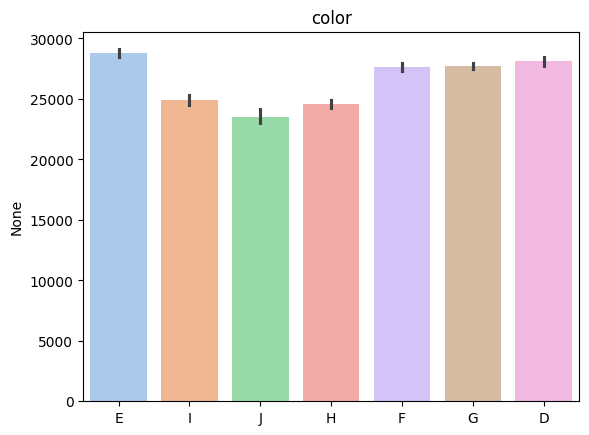

/tmp/ipykernel_7424/2378407523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[col].values, y = data[col].index,palette='pastel')


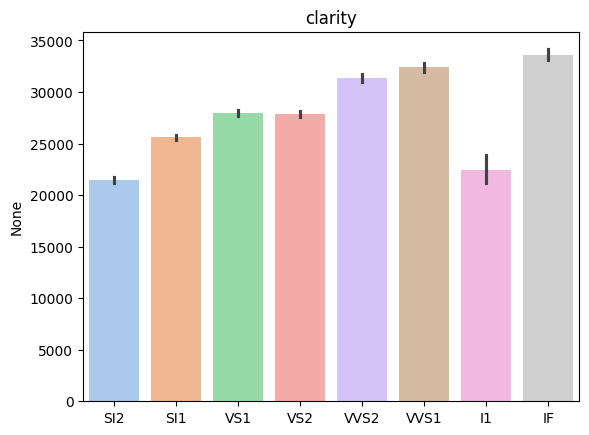

In [8]:
for col in data.columns:
    if data[col].dtype == 'object':
        plt.title(data[col].name)
        sns.barplot(x = data[col].values, y = data[col].index,palette='pastel')
        plt.show()
    

***creation and validation of hypotheses***

- h1 - 60% of diamonds are below the average price: False, 63% are below the average
- h2 - 30% of diamonds have a fair cut: False, only 2% have a fair cut
- h3 - 25% of diamonds have a medium color on the quality scale: False, only 20% have a medium color represented by the letter G
- h4 - 80% of diamonds have a clarity greater than (VS1 + VS2) (medium clarity): False, 19% only have a clarity greater than the sum of the average clarity (VS1 + VS2)

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* h1 - 60% of diamonds are below the average price:

In [12]:
# Calculate the average price of diamonds
preco_medio = data['price'].mean()

# Count the number of diamonds that are below the average price
diamonds_below_average = data[data['price'] < preco_medio].shape[0]

# Calculate the percentage of diamonds that are below the average price
total_diamonds = data.shape[0]
percentage_below_average = (diamonds_below_average * 100) / total_diamonds

print('RESULT: ',percentage_below_average)

RESULT:  63.5576566555432


* h2 - 30% of diamonds have a fair cut:


In [14]:
#total number of elements
total_number_of_diamonds = data.shape[0]

#total number of diamonds with the Fair cut()
cut_Fair = data.loc[data['cut'] == 'Fair'].shape[0]

# Calculate the percentage of diamonds that are with a Fair cut
fair_cut_percentage = (cut_Fair * 100)/total_number_of_diamonds

In [15]:
print('RESULT: ',fair_cut_percentage)

RESULT:  2.9847979236188356


* h3 - 25% of diamonds have an average color on the quality scale:

In [16]:
#unique values ​​and their quantities in percentage
x = ((data['color'].value_counts() * 0.01)/data.shape[0])


In [17]:
print('MEDIA COLOR G20%')

MEDIA COLOR G20%


* h4 - 80% diamonds have a clarity greater than VS2 (medium clarity):

In [18]:
y = ((data['clarity'].value_counts() * 0.01)/data.shape[0])

In [19]:

#representation in % in relation to the total value of elements
y

clarity
SI1     0.002422
VS2     0.002273
SI2     0.001704
VS1     0.001515
VVS2    0.000939
VVS1    0.000678
IF      0.000332
I1      0.000137
Name: count, dtype: float64

In [20]:

result_clarity = y['VVS2'] + y['VVS1'] + y['IF']

print('Result: ',result_clarity)

Result:  0.001948646644419726


#criando um data-test para ser feito um preprocessamento nas colunas categoricas e vericar a correlacao estatistica entre elas

# Preprocessing no dataset-test

In [21]:
data_test = data.copy()
data_test.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
#re-scaling some columns to try to improve model performance
mms = MinMaxScaler()
cols = ['carat','depth','table','x','y','z']
data_test[cols] = mms.fit_transform(data_test[cols])

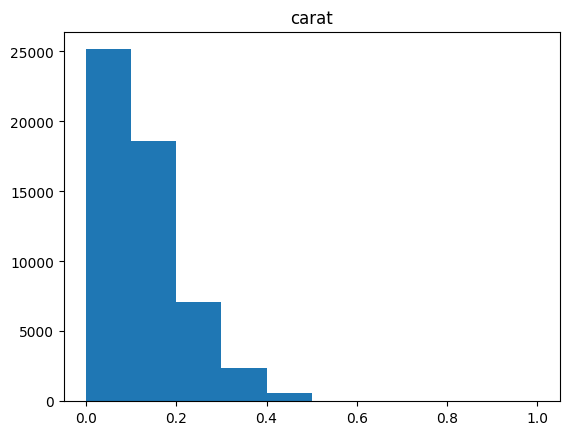

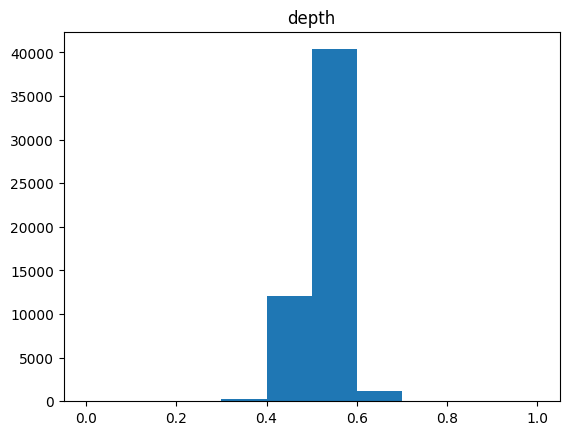

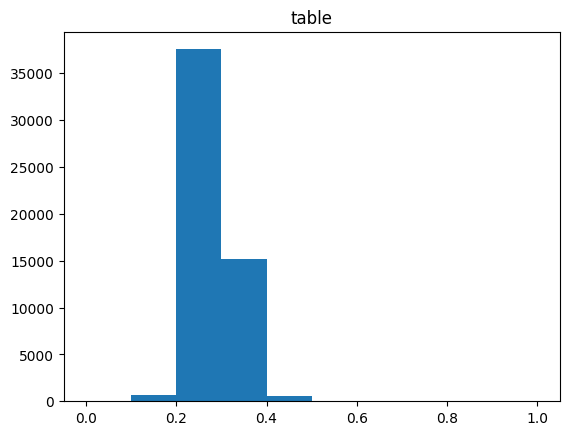

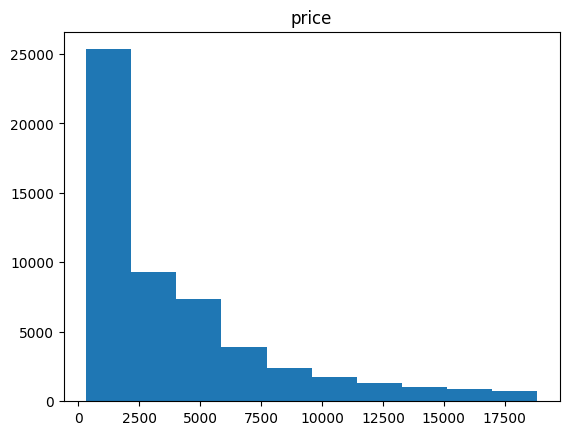

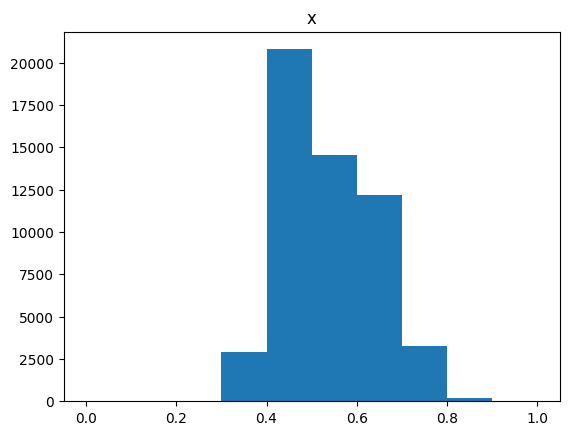

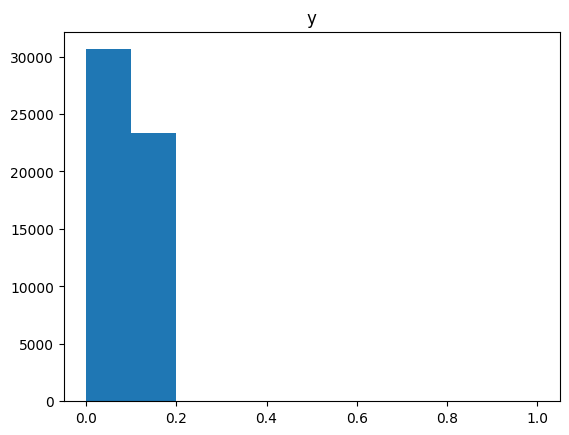

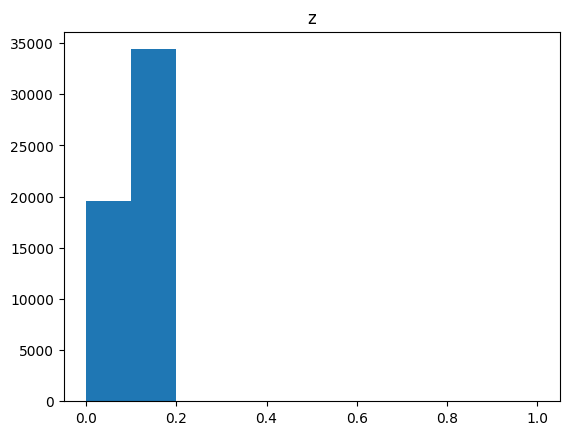

In [23]:
for col in data_test.columns:
    if data_test[col].dtype != 'object':
        plt.title(data_test[col].name)
        plt.hist(data_test[col],bins=10)
        plt.show()

<Axes: >

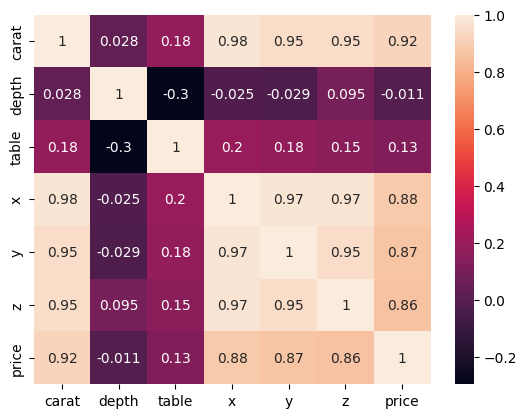

In [24]:
cols2 = ['carat','depth','table','x','y','z','price']
sns.heatmap(data[cols2].corr(),annot=True)

In [25]:
# Map categories to numeric values
color_mapping = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7 }

# Replace categories with numeric values
data_test['color'] = data_test['color'].map(color_mapping)
data_test['cut'] = data_test['cut'].map(cut_mapping)
data_test['clarity'] = data_test['clarity'].map(clarity_mapping)

# Stabilizing the encoders
encoder_color = OrdinalEncoder(categories='auto')
encoder_cut = OrdinalEncoder(categories='auto')
encoder_clarity = OrdinalEncoder(categories='auto')

# Tuning encoders with training data
encoder_color.fit(data_test[['color']])
encoder_cut.fit(data_test[['cut']])
encoder_clarity.fit(data_test[['clarity']])

# Encoding categorical values ​​in training data
data_test['color'] = encoder_color.transform(data_test[['color']])
data_test['cut'] = encoder_cut.transform(data_test[['cut']])
data_test['clarity'] = encoder_clarity.transform(data_test[['clarity']])

In [26]:
data_test.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.006237,4.0,1.0,1.0,0.513889,0.230769,326,0.367784,0.067572,0.076415
2,0.002079,3.0,1.0,2.0,0.466667,0.346154,326,0.362197,0.065195,0.072642
3,0.006237,1.0,1.0,4.0,0.386111,0.423077,327,0.377095,0.069100,0.072642
4,0.018711,3.0,5.0,3.0,0.538889,0.288462,334,0.391061,0.071817,0.082704
5,0.022869,1.0,6.0,1.0,0.563889,0.288462,335,0.404097,0.073854,0.086478


<Axes: >

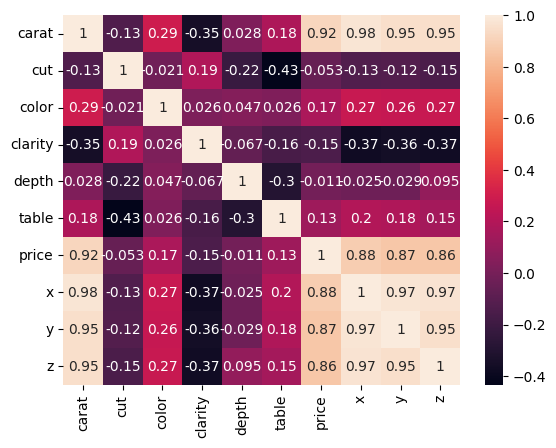

In [27]:
sns.heatmap(data_test.corr(),annot=True)

In [28]:
data_test.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.006237,4.0,1.0,1.0,0.513889,0.230769,326,0.367784,0.067572,0.076415
2,0.002079,3.0,1.0,2.0,0.466667,0.346154,326,0.362197,0.065195,0.072642
3,0.006237,1.0,1.0,4.0,0.386111,0.423077,327,0.377095,0.069100,0.072642
4,0.018711,3.0,5.0,3.0,0.538889,0.288462,334,0.391061,0.071817,0.082704
5,0.022869,1.0,6.0,1.0,0.563889,0.288462,335,0.404097,0.073854,0.086478


In [29]:
#splitting the data between training data and test data

#entire training dataset
X = data_test.drop('price',axis=1)

#entire test dataset
y = data_test['price']

#separating the entire training and test dataset into training and test subdivisions
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=200)

In [30]:
#establishing the ML model
LR = LinearRegression()
RD = Ridge()
RFR = RandomForestRegressor()

In [31]:
LR.fit(X_train,y_train)
pred_lr = LR.predict(X_test)

RD.fit(X_train,y_train)
pred_rd = RD.predict(X_test)

RFR.fit(X_train,y_train)
pred_RFR = RFR.predict(X_test)


In [32]:
#metrics for LinearRegression
print('LinearRegression')
print(f'MAE:{mean_absolute_error(pred_lr,y_test):.2f}')
print(f'MAPE:{mean_absolute_percentage_error(pred_lr,y_test):.2f}%')

print(f'MSE:{mean_squared_error(pred_lr,y_test):.2f}')
print(f'RMSE:{mean_squared_error(pred_lr,y_test,squared=False):.2f}')
print(f'R2:{r2_score(pred_lr,y_test):.2f}')

print('--------------------------------------------- ---------------------------------------------')

#metrics for Ridge
print('Ridge')

print(f'MAE:{mean_absolute_error(pred_rd,y_test):.2f}')
print(f'MAPE:{mean_absolute_percentage_error(pred_rd,y_test):.2f}%')

print(f'MSE:{mean_squared_error(pred_rd,y_test):.2f}')
print(f'RMSE:{mean_squared_error(pred_rd,y_test,squared=False):.2f}')
print(f'R2:{r2_score(pred_rd,y_test):.2f}')


#metrics for RandomForestRegressor
print('RandomForestRegressor')

print(f'MAE:{mean_absolute_error(pred_RFR,y_test):.2f}')
print(f'MAPE:{mean_absolute_percentage_error(pred_RFR,y_test):.2f}%')

print(f'MSE:{mean_squared_error(pred_RFR,y_test):.2f}')
print(f'RMSE:{mean_squared_error(pred_RFR,y_test,squared=False):.2f}')
print(f'R2:{r2_score(pred_RFR,y_test):.2f}')

LinearRegression
MAE:804.21
MAPE:1.97%
MSE:1455332.37
RMSE:1206.37
R2:0.90
--------------------------------------------- ---------------------------------------------
Ridge
MAE:813.68
MAPE:1.96%
MSE:1456054.93
RMSE:1206.67
R2:0.90
RandomForestRegressor
MAE:265.09
MAPE:0.06%
MSE:293944.44
RMSE:542.17
R2:0.98


/home/wendrel/virtual-enviroments/IA-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wendrel/virtual-enviroments/IA-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wendrel/virtual-enviroments/IA-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
